# 통계적 추정

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [8]:
df = pd.read_csv('./dataset/ch4_scores400.csv')
print(df.head())
scores = np.array(df['score'])

   score
0     76
1     55
2     80
3     80
4     74


In [7]:
p_mean = np.mean(scores) # 모평균
p_var = np.var(scores) # 모분산

p_mean, p_var

(69.530, 206.669)

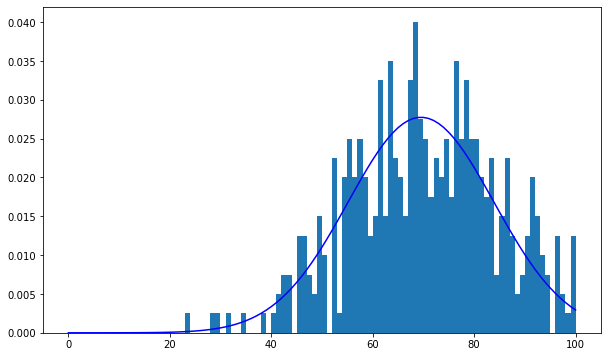

In [9]:
# 모집단이 정규분포를 이룬다고 가정하여 추정 수행
# 점수의 분포와 정규분포
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='blue')
ax.hist(scores, bins=100, range=(0,100), density=True)

plt.show()

In [10]:
# A학생이 무작위 추출한 표본 크기가 20인 표본
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [ ]:
np.random.seed(1111)
n_samples= 10000 # 표본 1만개
samples = np.random.choice(scores, (n_samples, n))

## 점추정

점추정
- 모평균이나 모분산 등의 모수를 하나의 수치로 추정
- 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 한다.
- 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
- 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치추정량이라고 함
- 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 말할 수 있다.
- 불편 : 편향이 없음

### 모평균의 점추정

In [25]:
df = pd.read_csv('./dataset/ch4_scores400.csv')
print('모평균:', df.score.mean())

np.random.seed(1111)
n_samples= 10000 # 표본 1만개
samples = np.random.choice(scores, (n_samples, n))

samples_means = np.mean(samples, axis=1)

print('모분산:', df.score.var())
sample_u_vars = np.var(samples, axis=1, ddof=1)
print('표본평균, 분산 :', np.mean(sample_means), np.mean(sample_u_vars))

모평균: 69.53
모분산: 207.1870676691731
표본평균, 분산 : 69.53799999999998 206.67808263157895


In [22]:
# 표본평균의 평균
samples_means = np.mean(samples, axis=1)
np.mean(sample_means)

69.538

In [12]:
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균: {s_mean:.3f}')    

1번째 표본평균: 67.000
2번째 표본평균: 72.850
3번째 표본평균: 69.200
4번째 표본평균: 64.450
5번째 표본평균: 72.650


In [14]:
# 표본크기 100만개일 때 표본평균
np.mean(np.random.choice(scores, int(1e6)))

69.543

In [23]:
# A학생이 추출한 표본의 표본평균
# A학생이 무작위 추출한 표본 크기가 20인 표본
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
s_mean = np.mean(sample)
s_mean

70.400

### 모분산의 점추정

- 표본을 뽑아쓰면 크기가 작아짐(과소추정)
- 그래서 불편분산에서 자유도를 n-1로 설정.

In [37]:
# p.268
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산: {s_var:.3f}')

1번째 표본분산: 116.800
2번째 표본분산: 162.928
3번째 표본분산: 187.060
4번째 표본분산: 149.148
5번째 표본분산: 111.528


In [26]:
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)

196.344

In [28]:
# 대수의 법칙으로 불편분산의 기댓값 확인
sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

206.678

In [35]:
# 표본100만으로 확인
np.var(np.random.choice(scores, int(1e6)), ddof=1)

206.910

In [36]:
# A학생이 추출한 표본으로 불편분산 계산
u_var = np.var(sample, ddof=1)
u_var

158.253

### 정리

- 추정량은 불편성과 일치성을 가지는 것이 바람직. 두 성질을 갖춘 추정량이 좋은 추정량
- 불편성 : 기댓값이 추측하기 원하는 모수가 되는 성질
- 일치성 : 표본 크기를 키우면 추측하기 원하는 모수에 수렴하는 성질

## 구간추정

### 정규분포의 모평균 구간추정 : 모분산을 알고 있는 경우

신뢰구간에 대한 해석
- 모평균을 포함할 확률이 95%가 되는 구간이 아니라
- 같은 방법으로 100번 표본을 추출했을 때, 함께 계산되는 100개의 신뢰구간 중 모평균을 포함한 신뢰구간들의 숫자가 95개 정도 된다

In [39]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl

(64.100, 76.700)

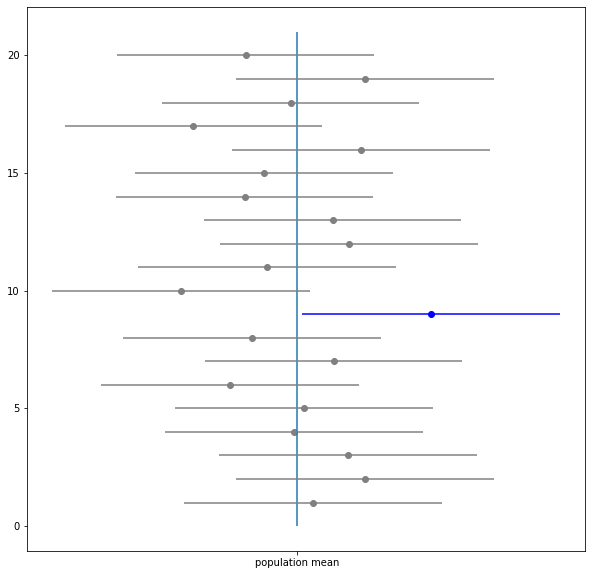

In [46]:
# p.275 모평균의 구간추정 시뮬레이션
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else :
        ax.scatter(s_mean_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])

plt.show()

In [45]:
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt += 1
cnt/len(samples)

0.951

### 정규분포의 모분산 구간추정

In [49]:
sample_y = sample_u_vars * (n-1) / p_var
sample_y

array([11.303, 15.767, 18.102, ..., 19.435,  9.265, 18.625])

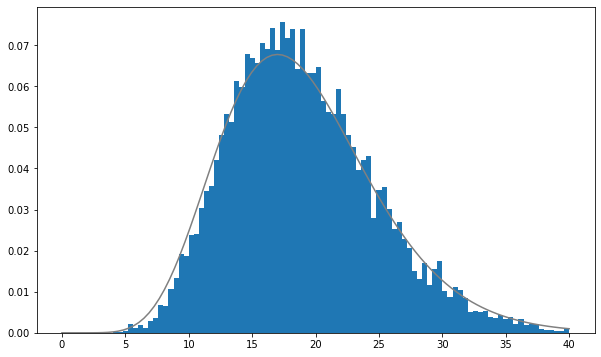

In [50]:
#  p.278 불편분산과 카이제곱분포
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 40, 100)
rv = stats.chi2(df=n-1) # 카이제곱
ax.plot(xs, rv.pdf(xs), color='gray')
hist, _, _ = ax.hist(sample_y, bins=100, range=(0,40), density=True)
plt.show()

In [52]:
# p.280
rv = stats.chi2(df=n-1)
lcl = (n-1) * u_var / rv.isf(0.025)
hcl = (n-1) * u_var / rv.isf(0.975)

lcl, hcl

(91.525, 337.596)

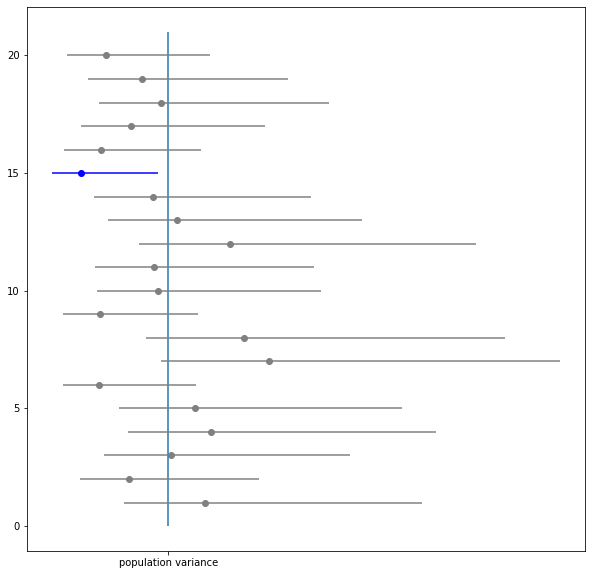

In [54]:
# p.281 모분산의 구간추정 시뮬레이션

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, 'b')
ax.set_xticks([p_var])
ax.set_xticklabels(['population variance'])

plt.show()

In [55]:
# p.283 신뢰구간을 1만번 계산하여 신뢰구간에 모분산이 포함된 것은 몇%인지
rv = stats.chi2(df=n-1)
cnt = 0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt += 1

cnt / len(samples)

0.964

### 정규분포의 모평균 구간추정 : 모분산을 모르는 경우

In [56]:
# p.285 A학생이 추출한 표본으로 구간추정하기
rv = stats.t(df=n-1)  # 자유도 n-1로 지정
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)

lcl, ucl

(64.512, 76.288)

### 베르누이 분포의 모평균 구간추정

In [57]:
import pandas as pd

enquete_df = pd.read_csv('./dataset/ch10_enquete.csv')
enquete = np.array(enquete_df['known'])
n = len(enquete)
enquete[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [60]:
# 점추정
s_mean = enquete.mean()
s_mean # 상품 A의 인지도는 70.9%

0.709

In [61]:
# p.288
rv = stats.norm() # 디폴트값은 표준정규분포
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean*(1-s_mean)/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean*(1-s_mean)/n)

lcl, ucl # 신뢰구간 95% 안에 ~

(0.681, 0.737)

### 포아송 분포의 모평균 신뢰구간

In [64]:
# 1시간당 액세스 수가 과거 72시간 분량이 들어있는 데이터.
# 이 사이트에 대한 1시간당 평균 액세스 수
n_access_df = pd.read_csv('./dataset/ch10_access.csv')
n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8], dtype=int64)

In [66]:
# p.289 모평균 lam 추정
s_mean = n_access.mean()
s_mean # 1시간당 평균 액세스 수는 10.444건

10.444

In [68]:
# 구간추정. 포아송 분포이 표본평균이 따르는 확률분포는 알지 못하므로 중심극한정리 사용
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)

lcl, ucl # 사이트에 대한 평균 액세스 수의 95% 신뢰구간

(9.698, 11.191)

- 과제 09/05 (1)

p.266~291

- 과제 09/05 (2)
 - 다음 용어를 예를 들어 설명하세요 : 불편성, 일치성, 불편분산
 - 카이제곱분포, t분포가 구간 추정에 활용된 사례를 만들어 설명하세요

In [ ]:
카이제곱분포 : 평균이 아니라 분산을 구할때 사용
t분포 : 모분산을 모르고 표본의 개수가 작을때(표본개수<30) 사용, 불편분산(ddof=1))사용

# 통계적 가설검정

In [8]:
import numpy as np
import pandas as pd
from scipy import stats

%precision 3
np.random.seed(1111)

In [11]:
# p.295 감자튀김
df = pd.read_csv('./dataset/ch11_potato.csv')
sample = np.array(df['무게'])
print(sample, '\n')
print(len(df))

[122.02 131.73 130.6  131.82 132.05 126.12 124.43 132.89 122.79 129.95
 126.14 134.45 127.64 125.68] 

14


In [14]:
# 표본평균
s_mean = np.mean(sample)
s_mean

128.451

## 통계적 가설검정

### 통계적 가설검정의 기본

- 통계적 가설검정이란
모집단의 모수에 관하여 두가지 가설을 세우고 표본으로부터 계산되는 통계량을 이용하여 어느 가설이 옳은지 판단하는 통계적인 방법
 - 검정통계량 vs 임곗값
 - p값 vs 유의수준


- 임곗값 : 주어진 유의수준에서 귀무가설의 채택과 기각에 관련된 의사를 결정할 때 그 기준이 되는 값. 확률로부터 발생 (귀무가설이 기각인지 채택인지를 판단하기 위한 기준)
- 유의수준 : 귀무가설이 실제로 옳음에도 기각할 오류
> 유의수준이랑 임곗값은 분석가가 설정한것

- 검정통계량에 해당하는 것이 p값?
- p값이 유의수준보다 크면 귀무가설 채택

<img src = './dataset/임곗값.png' width="500" height="500" >

In [17]:
# 모평균이 알려진 감자튀김 무게 평균 130g 보다 적은지 여부(모집단이 정규분포를 따르고 모분산은 9)
# p.296
rv = stats.norm(130, np.sqrt(9/14)) # 평균, 분산
print(rv.mean(), rv.std(), '\n')
print(rv.rvs(10), '/n')
rv.isf(0.95) # 확률변수(x) 

130.0 0.8017837257372732 

[128.958 129.14  130.634 129.296 131.204 129.981 130.221 129.225 128.733
 129.837] /n


128.681

<bound method _AxesBase.set_ylim of <AxesSubplot:xlabel='x', ylabel='pdf'>>

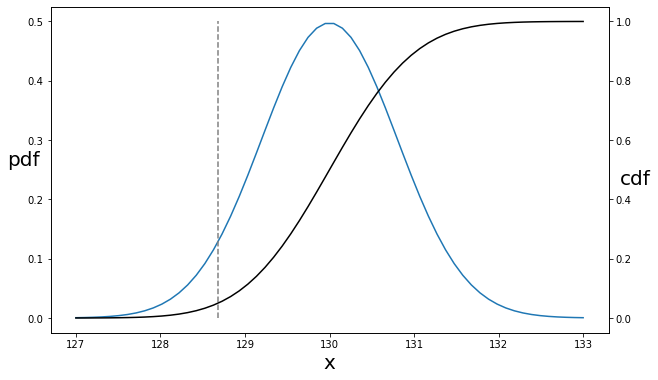

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
xs = np.linspace(127,133,60)

ax1.plot(xs,rv.pdf(xs)) # 확률밀도
ax2.plot(xs,rv.cdf(xs),color='black') # 누적분포
ax1.vlines(rv.ppf(0.05), 0,0.5, color='gray',ls='--')
ax1.set_xlabel("x",fontsize=20)
ax1.set_ylabel('pdf',rotation=0,fontsize=20)
ax2.set_ylabel('cdf',rotation=0,fontsize=20)
ax1.set_ylim

In [21]:
# 검정통계량 z : 표본평균을 표준화. (확률변수?) p.300
z = (s_mean - 130) / np.sqrt(9/14)
z

-1.932

In [23]:
# 임곗값
rv = stats.norm() # 표준정규분포로 만들어주고
rv.isf(0.95)
# 검정통계량이 임곗값보다 작으면 기각

-1.645

In [24]:
# 검정통계량으로부터 p값 산출 (p.301)
rv.cdf(z) # 누적분포함수에다 z값 넣어주면 p값 나옴
# p값이 유의수준 0.05보다 작으므로 귀무가설 기각

0.027

### 단측검정과 양측검정

-  단측검정과 양측검정

귀무가설 : 감자튀김의 무게는 130g이다.
 - 단측검정 : 감자튀김의 무게가 130g보다 작다를 대립가설로 수행
 - 양측검정 : 감자튀김의 무게는 130g이 아니다를 대립가설로 수행

In [25]:
z = (s_mean - 130) / np.sqrt(9/14)
z

-1.932

In [30]:
# p.304
rv = stats.norm()
rv.interval(0.95)

(-1.960, 1.960)

In [29]:
# 양측검정의 P값은 상단과 하단의 양쪽 면적을 고려해야 하므로 누적밀도함수의 2배로 한다.
rv.cdf(z) * 2

0.053

### 가설검정의 두 가지 오류

가설검정에서의 두 가지 오류
- 제1종 오류 : 귀무가설이 옳을 때 귀무가설을 기각하는 오류 (맞는데 기각)
  - '실제로 평균이 130g'인데도 평균은 130g 보다 작다라는 결론을 내리는 상황 
- 제2종 오류 : 대립가설이 옳을 때 귀무가설을 채택하는 오류 (틀렸는데 채택)
  - '모평균은 130g 보다 작다'인데도 모평균은 130g 보다 작다라는 결론을 얻을 수 없는 비율
- 통계적 가설검정에서는 제1종 오류는 제어할 수 있지만 제2종 오류는 제어할 수 없는 비대칭성이 있다.

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=santalsm&logNo=221553769276

<img src = './dataset/오류.png'>
<img src = './dataset/오류의 크기.png'>

#### 제 1종 오류

In [31]:
# 실제로 평균은 130g인 상황 고려 N(130,9) p.305
rv = stats.norm(130,3)

In [41]:
# 1종 오류를 범할 비율 : 위험률이라 하며 유의수준과 일치하므로 분석가가 제어할 수 있는 확률임
c = stats.norm().isf(0.95) # 유의수준 5%에서의 임곗값?
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_-130) / np.sqrt(9/14)
    if z < c : # 검정통계량 < 임곗값
        cnt += 1
cnt / n_samples # 1종 오류를 범한 비율
# 대략 5%의 비율로 '130g보다 작다' 라고 잘못 탐지하는 것

0.053

#### 제 2종 오류

In [42]:
# 2종 오류를 범하는 비율 : 1-베타(=검정력), 분석가가 제어할 수 없는 확률 p.307
rv = stats.norm(128, 3)
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_-130) / np.sqrt(9/14)
    if z >= c: # 검정통계량 >= 임곗값
        cnt += 1
cnt / n_samples

0.201

## 기본적인 가설검정

### 정규분포의 모평균에 대한 검정 : 모분산을 알고 있는 경우

In [64]:
def pmean_test(sample, mean0, p_var, alpha=0.05):
    s_mean = np.mean(sample)
    n= len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)
    
    z = (s_mean - mean0) / np.sqrt(p_var/n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설을 채택')
    else :
        print('귀무가설을 기각')
        
    if z < 0:
        p = rv.cdf(z) * 2
    else :
        p = (1- rv.cdf(z)) * 2
    print(f'p값은 {p:3f}')

In [67]:
pmean_test(sample, 130, 9)

귀무가설을 채택
p값은 0.053323


### 정규분포의 모분산에 대한 검정

In [68]:
import numpy as np
from scipy import stats

def pvar_test(sample, var0, alpha=0.05):
    u_var = np.var(sample, ddof=1)
    n =  len(sample)
    rv = stats.chi2(df=n-1) # 불편분산
    interval = rv.interval(1-alpha)
    
    y = (n-1) * u_var / var0
    if interval[0] <= y <= interval[1]:
        print('귀무가설을 채택')
    else :
        print('귀무가설을 기각')
    
    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else :
        p = (1- rv.cdf(y)) * 2
    print(f'p값은 {p:.3f}')

In [69]:
pvar_test(sample, 9)

귀무가설을 채택
p값은 0.085


### 정규분포의 모평균에 대한 검정 : 모분산을 모르는 경우

In [70]:
def pmean_test(sample, mean0, alpha=0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)
    
    t = (s_mean - mean0) / np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설을 채택')
    else :
        print('귀무가설을 기각')
        
    if t < 0:
        p = rv.cdf(t) * 2
    else :
        p = (1 - rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')

In [71]:
pmean_test(sample, 130)

귀무가설을 채택
p값은 0.169


In [73]:
# t검정. t검정통계량과 p값 p.313
t, p = stats.ttest_1samp(sample, 130)
t, p

(-1.455, 0.169)

## 2표본 문제에 관한 가설검정

### 대응비교 t 검정

In [76]:
import pandas as pd
# p.315
training_rel = pd.read_csv('./dataset/ch11_training_rel.csv')
print(training_rel.shape)
training_rel.head()

(20, 2)


,전,후
0,59,41
1,52,63
2,55,68
3,61,59
4,59,84


In [77]:
training_rel['차'] = training_rel['후'] - training_rel['전']
training_rel.head()

,전,후,차
0,59,41,-18
1,52,63,11
2,55,68,13
3,61,59,-2
4,59,84,25


In [79]:
from scipy import stats
# p.317
t, p = stats.ttest_1samp(training_rel['차'], 0)
p # p값이 유의수준보다 작기 때문에 귀무가설 기각

0.040

### 

In [80]:
t, p = stats.ttest_rel(training_rel['후'], training_rel['전'])
p

0.040

### 독립비교 t 검정

In [83]:
training_ind = pd.read_csv('./dataset/ch11_training_ind.csv')
print(training_ind.shape)
training_ind.head()

(20, 2)


,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


In [84]:
# p.320
t, p = stats.ttest_ind(training_ind['A'], training_ind['B'],
                      equal_var=False) # equal_var=False 지정하면 웰치의 방법으로 계산됨
p

0.087

### 카이제곱검정

카이제곱검정
- 독립성 검정이란 두 변수 'X,Y에 관해서 X와 Y가 독립이다.'라는 귀무가설과 'X,Y에 관해서 X와 Y가 독립이 아니다.'라는 대립가설에 의해 수행되는 검정
- 독립성 검정에 카이제곱분포가 사용되기 때문에 카이제곱검정이라고도 부른다.
- 광고A와 광고B간의 구입 비율에 유의한 차이가 있는지 확인하는 경우 사용할 수 있음.

In [45]:
import pandas as pd

ad_df = pd.read_csv('./dataset/ch11_ad.csv')
n = len(ad_df)
print(n)
ad_df.head()

1000


,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [48]:
# 교차집계표
ad_cross = pd.crosstab(ad_df['광고'],ad_df['구입'])
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [49]:
n_not, n_yes = ad_cross.sum() # 구입 안했다/했다 합의 비율
n_not, n_yes

(900, 100)

In [50]:
n_adA, n_adB = ad_cross.sum(axis=1) # A의 합과 B의 합 비율
n_adA, n_adB

(400, 600)

In [51]:
# 기대도수. p.334
ad_ef = pd.DataFrame({'했다':[n_adA*n_yes/n,
                          n_adB*n_yes/n],
                    '하지 않았다':[n_adA*n_not/n,
                             n_adB*n_not/n]},
                    index = ['A','B'])
ad_ef

,했다,하지 않았다
A,40.0,360.0
B,60.0,540.0


In [55]:
# 기대도수와 관측도수의 차이를 측정함으로써 검정 수행 p.335
y = ((ad_cross - ad_ef) ** 2 / ad_ef).sum().sum()
y # 검정통계량. 자유도가 1인 카이제곱분포를 근사적으로 따른다.

3.750

In [86]:
from scipy import stats
# 따르는 분포를 알면 p값 구하기 쉬움
rv = stats.chi2(1) # 파라미터 1인 카이제곱
1 - rv.cdf(y) # 귀무가설 채택

# >> 광고A와 광고B에 유의한 차이가 인정되지 않음

0.053

In [88]:
rv.sf(y)

0.053

In [61]:
# 검정통계량, p값, 자유도, 기대도수
chi2, p, dof, ef = stats.chi2_contingency(ad_cross, correction=False)
chi2, p, dof

(3.750, 0.053, 1)

In [62]:
ef

array([[360.,  40.],
       [540.,  60.]])

- 과제 09/07 (2)

카이제곱 검정을 이용하여 독립성 검정을 수행하는 사례를 작성하여 설명하세요.